In [2]:
!unzip -O cp949 ygyp.zip -d ./

Archive:  ygyp.zip
  inflating: ./requirements.txt      
  inflating: ./rough_official_name.csv  
  inflating: ./요기요_1-118.xlsx  
  inflating: ./요기요_일부_no추가VER1 (1).xlsx  
  inflating: ./요기요_일부_no추가VER1_119~236.xlsx  
  inflating: ./요기요_일부_no추가VER1_355~472.xlsx  
  inflating: ./요기요_일부_no추가VER1_473~591.xlsx  


In [6]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
#코랩 환경일 경우(1)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 27s (361 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [39]:
#코랩 환경일 경우(2)
# 런타임 재시작 후

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 코랩이 아닐 경우

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

# 크롤링

In [ ]:
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import requests
import pandas as pd
import numpy as np
import time
import re
import random
import warnings 
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

# 요기요 웹 크롤링

In [ ]:
url = "https://www.yogiyo.co.kr/api/v2/restaurants"
params = {
    "items": "1600",#1600곳 가게 불러오기
    "lat": "37.5006383",#역삼동으로 위치 선정
    "lng": "127.03789585",
    "order": "rank",
    "page": "0",
    "search": "",
    "serving_type": "vd"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36 Edg/113.0.1774.35",
    "X-APIKEY": "iphoneap",
    "X-APISECRET": "fe5183cc3dea12bd0ce299cf110a75a2"
}

response = requests.get(url, params=params, headers=headers)

data = response.json()

df = pd.DataFrame(data["restaurants"])

In [ ]:
df.drop(['except_cash', 'payment_methods','franchise_id','discount_percent','restaurant_type', 'additional_discount','lat', 'lng','has_shop_coupons','maximum_discount_coupon_price','is_deliverable','reason','is_ypx', 'section','section_pos', 'list_pos', 'phone', 'address', 'logo_url',
       'thumbnail_url', 'reachable', 'minimum_pickup_minutes','distance','serving_type','is_oe','discount_from', 'discount_until',
       'promotion_text', 'discounts', 'is_open','thumbnail_message','tags','new_rating'], axis=1, inplace=True)

In [ ]:
#리뷰수 100개 이상의 음식점만 가져오기
df = df[df['review_avg'] != 0]
df = df.reset_index(drop=True)
df = df[df['review_count'] >= 100]
df = df.reset_index(drop=True)
#df.to_csv('요기요_일부.csv', index=False, encoding='utf-8-sig')

In [ ]:
df = pd.read_csv('요기요_일부.csv')

In [ ]:
#아이디와 업소명만 따로 저장
df = df[['id','name']]
df= df[['name']]
#df.to_csv('아이디랑업소명.csv', index=False, encoding='utf-8-sig')

In [ ]:
df = pd.read_csv('아이디랑업소명.csv')
df

,id,name
0,264264,굽네치킨&피자-역삼1동점
1,365298,BHC-역삼스타점
2,508204,빅스타피자강남1호점
3,432130,버거킹-강남대로점
4,1089426,피제이피자-강남1호점
...,...,...
586,1092932,죠스익스프레스-논현1호점
587,259609,봉추찜닭-한티역점
588,1099743,88곱창-강남점
589,458209,죽보드람죽-본점


# 전처리
## 웹 크롤링으로 수집하지 못한 데이터인, 
## 식약처 등급, 세스코 유무 등의 정보들을 앱에서 직접 수집 후, 
## 위의 데이터에 직접 추가했습니다..

In [17]:
#전처리만 할 때
import pandas as pd
import numpy as np
import time
import re
import random
import warnings 
warnings.filterwarnings('ignore')

In [18]:
## 개별 분담하여 수집한 데이터들의 값을 통일
## 전체 데이터를 Concat하는 과정
## df1부터 df5까지 총 5개의 파일

#df1
df1 = pd.read_excel('/content/요기요_1-118.xlsx')
df1['식약처 등급'].fillna(0, inplace=True)
for i in range(df1.shape[0]):#식약처 등급 전처리
  if df1.iloc[i, 3] == '매우우수' :
    df1.iloc[i, 3] = 3
  elif df1.iloc[i, 3] == '우수' :
    df1.iloc[i, 3] = 2
  elif df1.iloc[i, 3] == '좋음' :
    df1.iloc[i, 3] = 1
df1.drop(['상이한 카테고리 음식 판매 여부', '가게배달 or 익스프레스배달 유무'], axis=1, inplace=True)
df1['식약처 등급'] =  df1['식약처 등급'].astype(int)
df1['세스코 유무'] = df1['세스코 유무'].astype(int)


temp118 =  pd.read_excel('/content/요기요_일부_no추가VER1 (1).xlsx').iloc[117:, :]
temp118.drop(['상이한 카테고리 음식 판매 여부', '가게배달 or 익스프레스배달 유무'], axis=1, inplace=True)

df1 = pd.concat([df1, temp118], axis=0)
df1 = df1.loc[df1.no < 118, :]

#df2
df2 = pd.read_excel('/content/요기요_일부_no추가VER1_119~236.xlsx')
df2['식약처 등급'].fillna(0, inplace=True)
for i in range(df2.shape[0]):
  if df2.iloc[i, 3] == '매우우수' :
    df2.iloc[i, 3] = 3
  elif df2.iloc[i, 3] == '우수' :
    df2.iloc[i, 3] = 2
  elif df2.iloc[i, 3] == '좋음' :
    df2.iloc[i, 3] = 1
df2.drop(['상이한 카테고리 음식 판매 여부', '가게배달 or 익스프레스배달 유무'], axis=1, inplace=True)
df2['식약처 등급'] =  df2['식약처 등급'].astype(int)
df2['세스코 유무'] = df2['세스코 유무'].astype(int)


#df3
df3 = pd.read_excel('/content/요기요_일부_no추가VER1 (1).xlsx')
df3 = df3.iloc[236:354,:]


df3['세스코 유무'].fillna(0, inplace=True)
df3['식약처 등급'].fillna(0, inplace=True)
for i in range(df3.shape[0]):
  if df3.iloc[i, 3] == '매우 우수' :
    df3.iloc[i, 3] = 3  
  elif df3.iloc[i, 3] == '매우우수' :
    df3.iloc[i, 3] = 3
  elif df3.iloc[i, 3] == '우수' :
    df3.iloc[i, 3] = 2
  elif df3.iloc[i, 3] == '좋음' :
    df3.iloc[i, 3] = 1
  elif df3.iloc[i, 3] == 'x' :
    df3.iloc[i, 3] = 0
for i in range(df3.shape[0]):
  if df3.iloc[i, 4] == 'o' :
    df3.iloc[i, 4] = 1 
  elif df3.iloc[i, 4] == 'x' :
    df3.iloc[i, 4] = 0

df3.drop(['상이한 카테고리 음식 판매 여부', '가게배달 or 익스프레스배달 유무'], axis=1, inplace=True)
df3['식약처 등급'] =  df3['식약처 등급'].astype(int)
df3['세스코 유무'] = df3['세스코 유무'].astype(int)


#df4
df4 = pd.read_excel('/content/요기요_일부_no추가VER1_355~472.xlsx')
df4 = df4.iloc[355:472,:]

df4['세스코 유무'].fillna(0, inplace=True)
df4['식약처 등급'].fillna(0, inplace=True)
for i in range(df4.shape[0]):
  if df4.iloc[i, 3] == '매우우수' :
    df4.iloc[i, 3] = 3
  elif df4.iloc[i, 3] == '우수' :
    df4.iloc[i, 3] = 2
  elif df4.iloc[i, 3] == '좋음' :
    df4.iloc[i, 3] = 1

df4.drop(['상이한 카테고리 음식 판매 여부', '가게배달 or 익스프레스배달 유무'], axis=1, inplace=True)
df4['식약처 등급'] =  df4['식약처 등급'].astype(int)
df4['세스코 유무'] = df4['세스코 유무'].astype(int)


#df5
df5 = pd.read_excel('/content/요기요_일부_no추가VER1_473~591.xlsx')

df5['세스코 유무'].fillna(0, inplace=True)
df5['식약처 등급'].fillna(0, inplace=True)
for i in range(df5.shape[0]):
  if df5.iloc[i, 3] == '매우우수' :
    df5.iloc[i, 3] = 3
  elif df5.iloc[i, 3] == '우수' :
    df5.iloc[i, 3] = 2
  elif df5.iloc[i, 3] == '좋음' :
    df5.iloc[i, 3] = 1

df5.drop(['상이한 카테고리 음식 판매 여부', '가게배달 or 익스프레스배달 유무'], axis=1, inplace=True)
df5['식약처 등급'] =  df5['식약처 등급'].astype(int)
df5['세스코 유무'] = df5['세스코 유무'].astype(int)

# concat
total_df = pd.concat([df1, df2, df3, df4, df5], axis=0).reset_index(drop=True).sort_values('no')

## 카테고리 원핫 인코딩을 위해, 모든 카테고리 값들을 List에 Append 후, Set으로 중복되지 않게끔하여, Unique Value(Category)만 남김 
cat_check = []
for i in range(total_df.shape[0]):
  temp = total_df.iloc[i, 6].replace('[', '').replace(']', '').replace('\'', '').replace(',', '').split()
  for j in range(len(temp)):
    cat_check.append(temp[j])

all_cat = set(cat_check)


## 위에서 파악한 전체 카테고리 중 해당 음식점이 해당 카테고리에 해당하는 지 여부를 확인 후, 0과 1로 원핫인코딩을 진행
for i in range(total_df.shape[0]):
  temp = total_df.iloc[i, 6].replace('[', '').replace(']', '').replace('\'', '').replace(',', '').split()
  total_df.loc[i, 'N_CAT'] = len(temp)
  for cat in all_cat :
    if cat in temp :
      total_df.loc[i,f'{cat}'] = 1
    else :
      total_df.loc[i,f'{cat}'] = 0
total_df.drop(['categories'], axis=1, inplace=True)



## 전체 서비스 제공 방식을 파악
## 익스프레스 유무, 포장 유무를 인코딩하기 위함
serve_check = []
for i in range(total_df.shape[0]):
  temp = total_df.iloc[i, 12].replace('[', '').replace(']', '').replace('\'', '').replace(',', '').split()
  for j in range(len(temp)):
    serve_check.append(temp[j])

all_serve = set(serve_check)

## 이렇게 파악한 서빙 타입을 통해, 카테고리와 같은 방식으로
## 지원 여부를 0과 1을 통해, 원핫인코딩을 진행 
for i in range(total_df.shape[0]):
  temp = total_df.iloc[i, 12].replace('[', '').replace(']', '').replace('\'', '').replace(',', '').split()
  for serve in all_serve :
    if serve in temp :
      total_df.loc[i,f'{serve}'] = 1
    else :
      total_df.loc[i,f'{serve}'] = 0


## 이렇게 확인한 서빙 타입을 드롭하고, 모든 식당이 배달은 지원하는 점에서 vd(가게 배달) 여부는 Drop
total_df.drop(['available_serving_types', 'vd'], axis=1, inplace=True)
# total_df.columns
## 알아보기 편한 칼럼명으로 지정
total_df.columns = ['no', 'id', 'name', '식약처 등급', '세스코 유무', '찜수', 'review_avg',
       'review_count', 'owner_reply_count', 'begin', 'end', 'is_new',
       'min_order_amount', 'free_delivery_threshold', 'adjusted_delivery_fee',
       'estimated_delivery_time', 'delivery_fee_to_display', 'N_CAT','아시안',
       'SNS맛집', '회초밥', '한식', '치킨', '프랜차이즈', '일식돈까스', '피자양식', '버거', '다회용기',
       '샐러드', '1인분주문', '신규맛집', '샌드위치', '카페디저트', '야식', '족발보쌈', '고기구이', '찜탕',
       '중식', '분식', '도시락죽', '테이크아웃', '포장_여부', '익스프레스_여부']


## 모든 시간 데이터를 분 단위로 변경 후,  영업 시작 시간과 영업 종료 시간을 통해, 운영시간 파생 칼럼을 만듭니다.
## 이 때, 영업시작 시간이 영업 마감 시간보다 큰 경우는, 자정을 넘어가는 경우이므로, 마감 분 단위 시간에 1440(24*60)을 더해 처리합니다.
for i in range(total_df.shape[0]):
    total_df.loc[i, 'begin'] = int((total_df.loc[i, 'begin'].hour *60)  + total_df.loc[i, 'begin'].minute)
    total_df.loc[i, 'end'] = int((total_df.loc[i, 'end'].hour *60)  + total_df.loc[i, 'end'].minute)
    if total_df.loc[i, 'begin'] >  total_df.loc[i, 'end'] :
      total_df.loc[i, 'end'] = total_df.loc[i, 'end'] + (24 * 60)
    total_df.loc[i, 'operating_time'] = total_df.loc[i, 'end'] - total_df.loc[i, 'begin']


## 음식 도착까지 걸리는 시간 데이터가 범위로 되어있으며, 해당 범위가 전부 5분의 범위를 갖는 점에서, 최단 시간을 기준으로 처리합니다.
for i in range(total_df.shape[0]):
  total_df.loc[i, 'estimated_delivery_time'] = int(total_df.loc[i, 'estimated_delivery_time'][:2])


## 신규 업체 카테고리 인코딩
for i in range(total_df.shape[0]):
  if total_df.loc[i, 'is_new'] :
    total_df.loc[i, 'is_new'] = 1
  else :
    total_df.loc[i, 'is_new'] = 0

for i in range(total_df.shape[0]):
  if total_df.loc[total_df.index==i, 'operating_time'].values == 0 :
    total_df.loc[total_df.index==i, 'operating_time'] = 1440

#delivery_fee_to_display 변수 딕셔너리 값으로 수정
total_df['delivery_fee_to_display'] = total_df['delivery_fee_to_display'].apply(lambda x: eval(x)['basic'])

#배달팁 완전 무료:0, 배달팁 유료:1
total_df.loc[total_df['delivery_fee_to_display'].str[0:2] == '무료', '배달팁무료여부'] = 0
total_df.loc[total_df['delivery_fee_to_display'].str[0:2] != '무료', '배달팁무료여부'] = 1

#배달팁 무료가 전혀 없는 경우, 무료 기준의 최대치로 인코딩
total_df.loc[total_df['free_delivery_threshold'] == 0, 'free_delivery_threshold'] = total_df.loc[total_df['free_delivery_threshold'] != 0, 'free_delivery_threshold'].max()

#배달팁이 무료인 경우, 0으로 인코딩
total_df['delivery_fee_to_display']=total_df['delivery_fee_to_display'].replace('무료',0)

# 배달비를 전부 숫자로 변경
data = total_df['delivery_fee_to_display']
numbers = data.apply(lambda x: re.findall(r'\d+', str(x)))
result = numbers.apply(lambda x: int(''.join(x)) if x else None)
total_df['delivery_fee_to_display']=result

# 소범주 카테고리 및 비사용 칼럼 제거
total_df.drop(['estimated_delivery_time','adjusted_delivery_fee','도시락죽','샌드위치', '샐러드', '카페디저트','회초밥','다회용기', '족발보쌈' , '야식','신규맛집','1인분주문', '테이크아웃', 'SNS맛집'], axis=1, inplace=True)

# 4.7을 기준으로 라벨링
total_df['review_avg'] = total_df['review_avg'].apply(lambda x: x>4.7)

# 평균이 4.73인 점에서 반올림한 4.7을 기준으로 '평균별점이상'이라는 라벨 부여
for i in range(total_df.shape[0]):
  if total_df.loc[i, 'review_avg'] :
    total_df.loc[i, '평균별점이상'] = 1
  else :
    total_df.loc[i, '평균별점이상'] = 0

# 일부 카테고리 int로 타입 변경
toint_list = ['begin', 'end', 'is_new', '식약처 등급', '세스코 유무']
total_df.drop(['review_avg'], axis=1, inplace=True)
total_df[toint_list] = total_df[toint_list].astype('int') 

# 카테고리 한글화
total_df.columns = ['no', 'id', '등록명', '식약처 등급', '세스코 유무', 
                    '찜수',  '총리뷰수', '사장님댓글수', '영업시작시간', 
                    '영업종료시간','신규여부', '최소주문금액', '무료배달기준', 
                    '최소배달요금', '카테고리수', '아시안', '한식', '치킨', '프랜차이즈', 
                    '일식돈까스', '피자양식', '버거', '고기구이', '찜탕', '중식', '분식',
                    '포장_여부', '익스프레스_여부', '운영시간','배달팁무료여부','평균별점이상']


df3 = total_df.copy()
# 상호명 파일 불러오기
name = pd.read_csv('/content/rough_official_name.csv')

# 상호명 지정을 위한 no 동기화
name.columns = ['no', '상호명']
dup1 = name.duplicated(['no'], keep='first')
df_dup1 = pd.concat([name, dup1], axis=1)
df_dup1.rename(columns= {0:'Dup'}, inplace=True)
trimmed_df = df_dup1.loc[df_dup1['Dup']==False, ['no', '상호명']]
trimmed_df['no'] = trimmed_df['no'] + 1


# 넘버를 기준으로 상호명 삽입
for n,m in zip(trimmed_df['no'], trimmed_df['상호명']) :
  df3.loc[df3.no== n, '상호명'] = m

# 일부 크롤링 오류 정정
df3.loc[df3['no']==61, '상호명'] = '반올림피자샵강남2호점'
df3.loc[df3['no']==123, '상호명'] = '꾸브라꼬숯불두마리치킨강남점'
df3.loc[df3['no']==556, '상호명'] = '낭만타코'
df3.loc[df3['no']==472, '찜수'] = 518

# 결측 행 제거
df3.dropna(inplace=True)

import re

# 상호명 中 무의미한 값 제거 (1)
del_list = [' ', '-', '주식회사', '(주)', '\(', '\)', '&']

for j in range(df3.shape[0]):
  for i in del_list :
    df3.iloc[j, -1] = re.sub(i, '', df3.iloc[j, -1])
    df3.iloc[j, 2] = re.sub(i, '', df3.iloc[j, 2])



# 상호명 中 무의미한 값 제거 (2)
for j in range(df3.shape[0]):
  df3.iloc[j, -1] = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", df3.iloc[j, -1])
  df3.iloc[j, 2] = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", df3.iloc[j, 2])

# Stride 방식으로 상호명 대조, 불일치 여부 확인
def accuracy_score(str1, str2):
    chunks_str1 = [str1[i:i+2] for i in range(0, len(str1)-1)]
    total_chunks = len(chunks_str1)
    matching_chunks = sum(1 for chunk in chunks_str1 if chunk in str2)
    return matching_chunks / total_chunks if total_chunks > 0 else 0


# 적용
df3['정확도'] = df3.apply(lambda row: accuracy_score(row['상호명'], row['등록명']), axis=1)

# 프랜차이즈 회사는 정확도 1점화
for i in range(df3.shape[0]):
  df3.loc[df3.프랜차이즈 == 1, '정확도'] = 1

# 정확도를 오차율로 변경
df3['오차율'] = 1 - df3['정확도']
df3.drop(['정확도'], axis=1, inplace=True)
df3['오차율'].value_counts()

# 식별자 제거
df3.drop(['no', 'id', '등록명', '상호명'], axis=1, inplace=True)
df3.reset_index(drop=True, inplace=True)

# 다음 처리 과정을 위한 임시 저장
df3.to_csv('df3.csv', index=False)

# EDA

In [ ]:
df = pd.read_csv('df3.csv')

In [ ]:
#null값 확인
df.isnull().sum()

식약처 등급      0
세스코 유무      0
찜수          0
총리뷰수        0
사장님댓글수      0
영업시작시간      0
영업종료시간      0
신규여부        0
최소주문금액      0
무료배달기준      0
최소배달요금      0
카테고리수       0
아시안         0
한식          0
치킨          0
프랜차이즈       0
일식돈까스       0
피자양식        0
버거          0
고기구이        0
찜탕          0
중식          0
분식          0
포장_여부       0
익스프레스_여부    0
운영시간        0
배달팁무료여부     0
평균별점이상      0
오차율         0
dtype: int64

<Axes: >

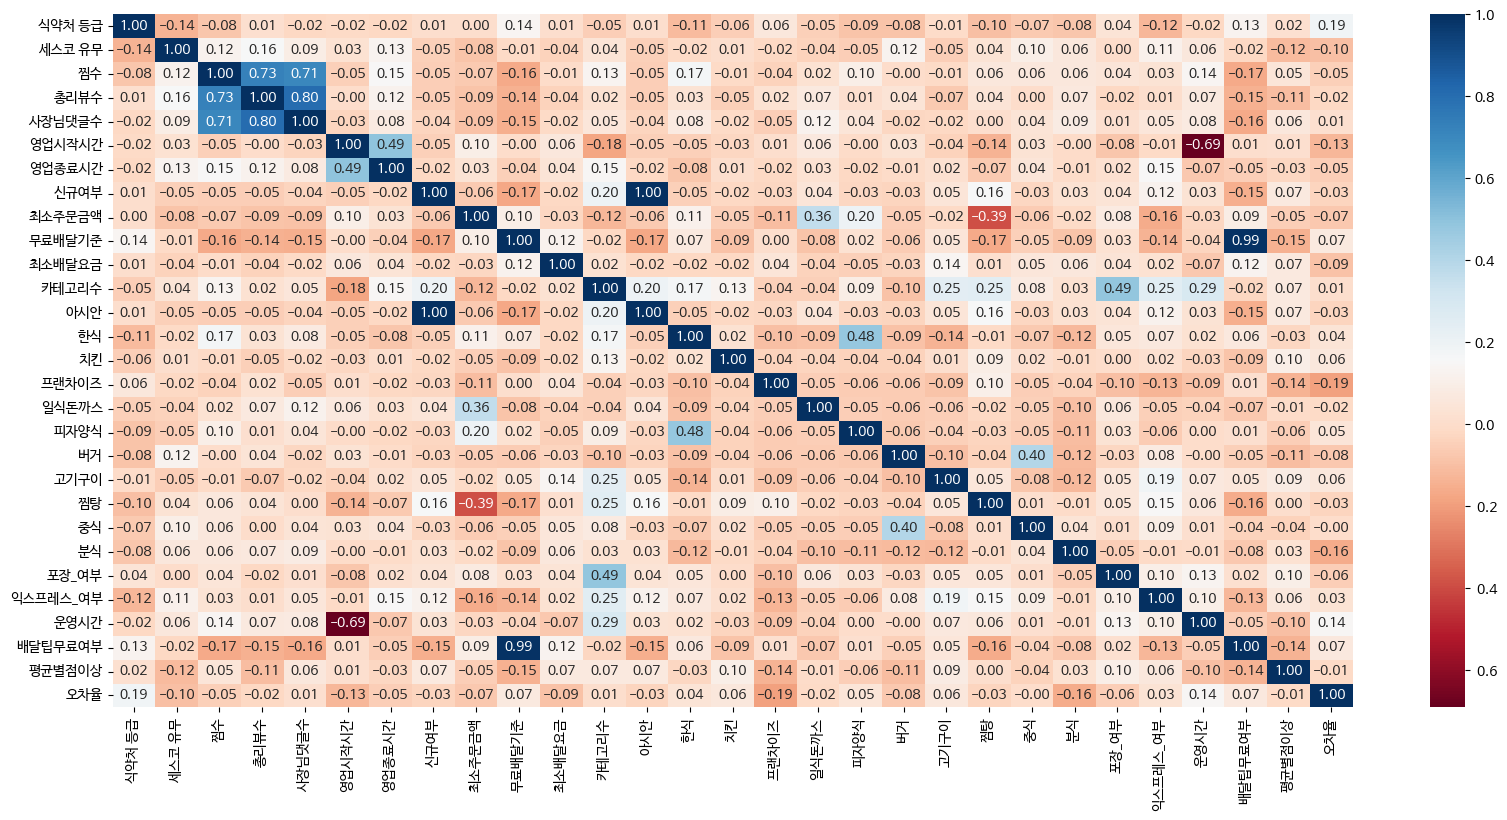

In [ ]:

## 피어슨 상관계수를 통한 시각화
plt.figure(figsize=(20, 9))
corr = df.corr()#각 변수간의 상관관계 확인
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu')

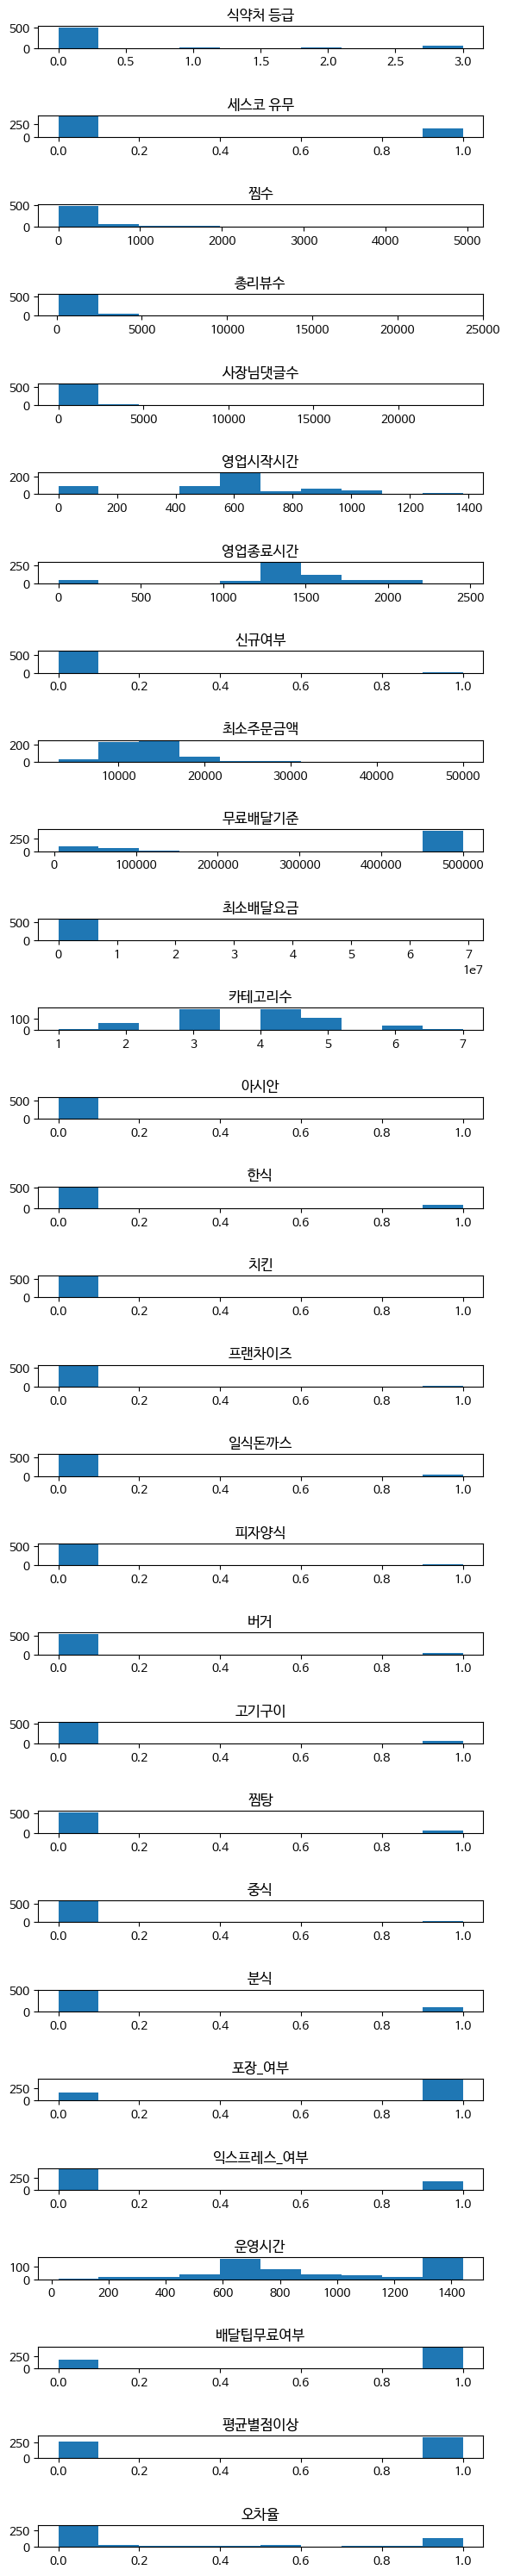

In [ ]:
num_rows = len(df.columns)
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 30))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=10)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()#데이터 분포 시각화

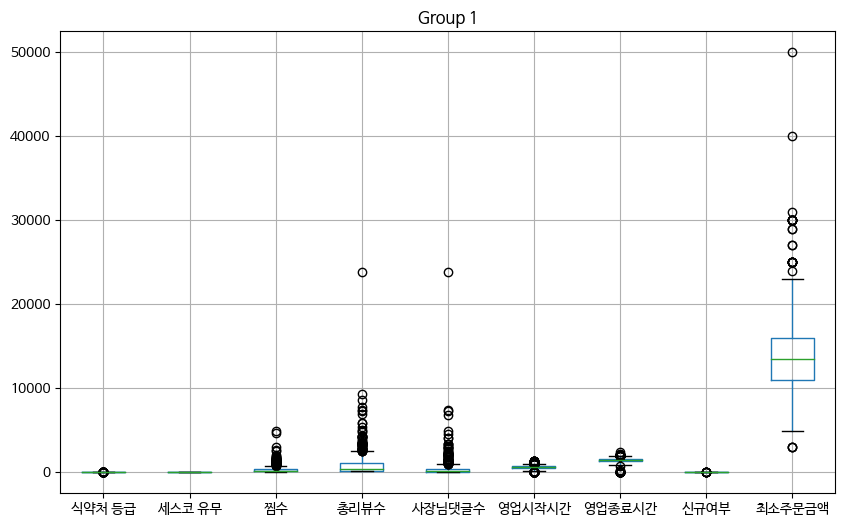

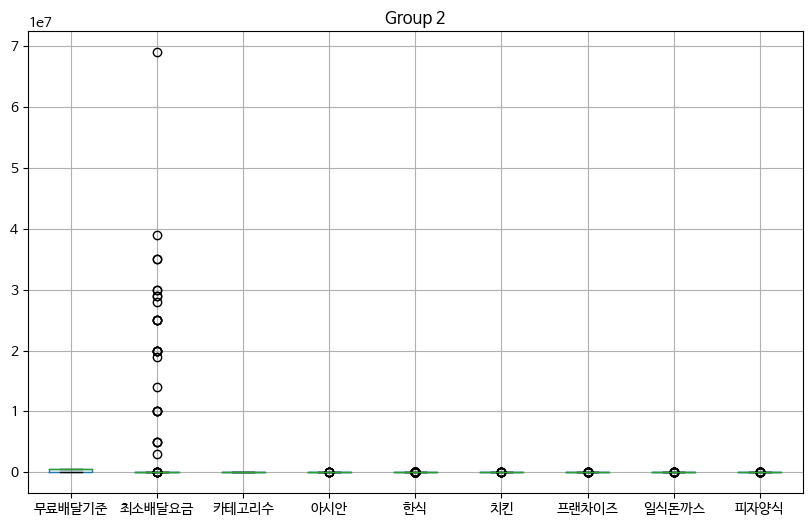

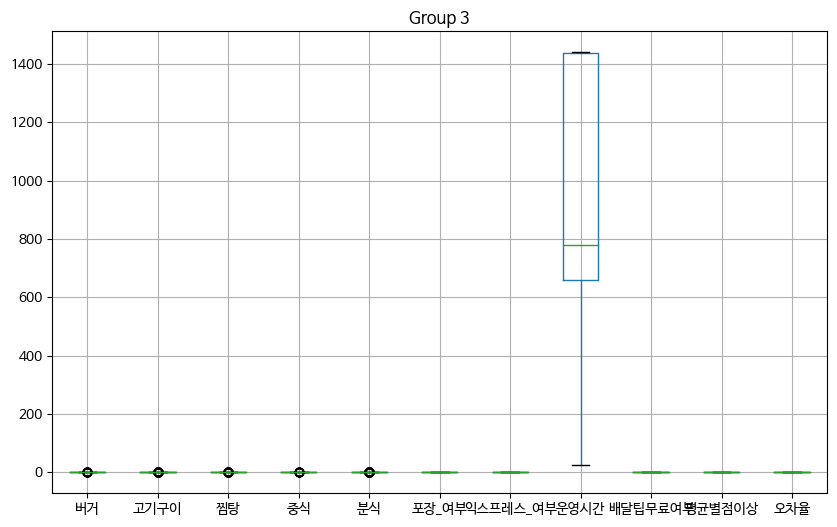

In [ ]:

# 컬럼을 세 개의 그룹으로 분할
group1 = df.columns[:len(df.columns)//3]
group2 = df.columns[len(df.columns)//3:2*(len(df.columns)//3)]
group3 = df.columns[2*(len(df.columns)//3):]

# 그룹1에 대한 boxplot 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))
df[group1].boxplot(ax=ax1, showfliers=True)
ax1.set_title('Group 1')  # 그래프 제목 설정

# 그룹2에 대한 boxplot 그리기
fig, ax2 = plt.subplots(figsize=(10, 6))
df[group2].boxplot(ax=ax2, showfliers=True)
ax2.set_title('Group 2')  # 그래프 제목 설정

# 그룹3에 대한 boxplot 그리기
fig, ax3 = plt.subplots(figsize=(10, 6))
df[group3].boxplot(ax=ax3, showfliers=True)
ax3.set_title('Group 3')  # 그래프 제목 설정

plt.show()

# 추가 전처리 및 모델링

In [ ]:
# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.

%matplotlib inline
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname='C:\\WINDOWS\\Fonts\\나눔고딕Bold.ttf')
import os
# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [1]:
# library
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, auc

## XGBoost

# 스케일링 전/오버샘플링 전

In [ ]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,1.0,1.0,0.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,1.0,1.0,0.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,1.0,1.0,0.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,1.0,0.0,0.0,0.0,1.0,0.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,1.0,0.0,0.0,1.0,0.0,1440.0,1.0,0.0,1.000000


In [ ]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# GridSearchCV에 대한 param_grid 정의
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.90, 1.0],
}

# XGBClassifier CUDA 가능한 경우
xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1, random_state=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
# y_pred = grid_search.predict(X_test)

# best parameters과 best score 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


print(f'accuracy: {accuracy_score(y_test, y_pred):.5}')
print(f'precision: {precision_score(y_test, y_pred):.5}')
print(f'recall: {recall_score(y_test, y_pred):.5}')
print(f'f1: {f1_score(y_test, y_pred):.5}')
print(classification_report(y_test, y_pred))

Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.7187813081436955
accuracy: 0.69886
precision: 0.64706
recall: 0.875
f1: 0.74396
              precision    recall  f1-score   support

         0.0       0.81      0.52      0.63        88
         1.0       0.65      0.88      0.74        88

    accuracy                           0.70       176
   macro avg       0.73      0.70      0.69       176
weighted avg       0.73      0.70      0.69       176



# 스케일링 전/ 오버샘플링 후

In [ ]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,1.0,1.0,0.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,1.0,1.0,0.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,1.0,1.0,0.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,1.0,0.0,0.0,0.0,1.0,0.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,1.0,0.0,0.0,1.0,0.0,1440.0,1.0,0.0,1.000000


In [ ]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from imblearn.over_sampling import SMOTENC

# categorical features
categorical_features = [1, 7, 8,10,11,13,14,15,16,17,18,19,20,21,22,23,24]  # Replace with the indices of the categorical features in your dataset

# SMOTENC 적용 
smotenc = SMOTENC(categorical_features=categorical_features, random_state=0)

X_train_over, y_train_over = smotenc.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (409, 28) (409,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (490, 28) (490,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    245
1.0    245
Name: 평균별점이상, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# GridSearchCV에 대한 param_grid 정의
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.90, 1.0],
}

# XGBClassifier
xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1, random_state=0)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3)

# grid_search.fit(X_train_over, y_train_over)
# # y_pred = grid_search.predict(X_test)

# # best parameters과 best score 출력
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

grid_search.fit(X_train_over, y_train_over)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
# y_pred = grid_search.predict(X_test_scaled)

# 베스트 파라미터와 베스트 스코어 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


print(f'accuracy: {accuracy_score(y_test, y_pred):.5}')
print(f'precision: {precision_score(y_test, y_pred):.5}')
print(f'recall: {recall_score(y_test, y_pred):.5}')
print(f'f1: {f1_score(y_test, y_pred):.5}')
print(classification_report(y_test, y_pred))

Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 100, 'subsample': 1.0}
Best Score:  0.7551498827871713
accuracy: 0.69886
precision: 0.65487
recall: 0.84091
f1: 0.73632
              precision    recall  f1-score   support

         0.0       0.78      0.56      0.65        88
         1.0       0.65      0.84      0.74        88

    accuracy                           0.70       176
   macro avg       0.72      0.70      0.69       176
weighted avg       0.72      0.70      0.69       176



# ----------------------------------

# ----------------------------------

# ----------------------------------

# ----------------------------------

# 스케일링 후/ 오버샘플링 전

In [ ]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,1.0,1.0,0.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,1.0,1.0,0.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,1.0,1.0,0.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,1.0,0.0,0.0,0.0,1.0,0.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,1.0,0.0,0.0,1.0,0.0,1440.0,1.0,0.0,1.000000


In [ ]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

#스케일링
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# GridSearchCV에 대한 param_grid 정의
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.90, 1.0],
}

# XGBClassifier
xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1, random_state=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3)

grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)
# y_pred = grid_search.predict(X_test_scaled)

# 베스트 파라미터와 베스트 스코어 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


print(f'accuracy: {accuracy_score(y_test, y_pred):.5}')
print(f'precision: {precision_score(y_test, y_pred):.5}')
print(f'recall: {recall_score(y_test, y_pred):.5}')
print(f'f1: {f1_score(y_test, y_pred):.5}')
print(classification_report(y_test, y_pred))

Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.7187813081436955
accuracy: 0.69886
precision: 0.64706
recall: 0.875
f1: 0.74396
              precision    recall  f1-score   support

         0.0       0.81      0.52      0.63        88
         1.0       0.65      0.88      0.74        88

    accuracy                           0.70       176
   macro avg       0.73      0.70      0.69       176
weighted avg       0.73      0.70      0.69       176



# --------------------------------------------------------------

# --------------------------------------------------------------

# 스케일링 후 / 오버샘플링 후

In [ ]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,0.0,1.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,0.0,0.0,1.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [10]:
df_1 = df.drop(df.columns[13:23], axis=1)
df_1

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,최소배달요금,카테고리수,아시안,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,2000,5.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,3000,3.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,0,4.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,2500,2.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,1500,4.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,3000,4.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,3500,4.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,3000,5.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,3000,5.0,0.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [11]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

#스케일링
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from imblearn.over_sampling import SMOTENC

# categorical features
categorical_features = [1, 7, 8,10,11,13,14,15,16,17,18,19,20,21,22,23,24]  # Replace with the indices of the categorical features in your dataset

# SMOTENC 적용
smotenc = SMOTENC(categorical_features=categorical_features, random_state=0)

X_train_over, y_train_over = smotenc.fit_resample(X_train_scaled, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (409, 28) (409,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (490, 28) (490,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    245
1.0    245
Name: 평균별점이상, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# GridSearchCV에 대한 param_grid 정의
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.90, 1.0],
}

# XGBClassifier 모델
xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1, random_state=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train_over, y_train_over)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)
# y_pred = grid_search.predict(X_test_scaled)

# 베스트 파라미터와 베스트 스코어 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


print(f'accuracy: {accuracy_score(y_test, y_pred):.5}')
print(f'precision: {precision_score(y_test, y_pred):.5}')
print(f'recall: {recall_score(y_test, y_pred):.5}')
print(f'f1: {f1_score(y_test, y_pred):.5}')
print(classification_report(y_test, y_pred))

In [13]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

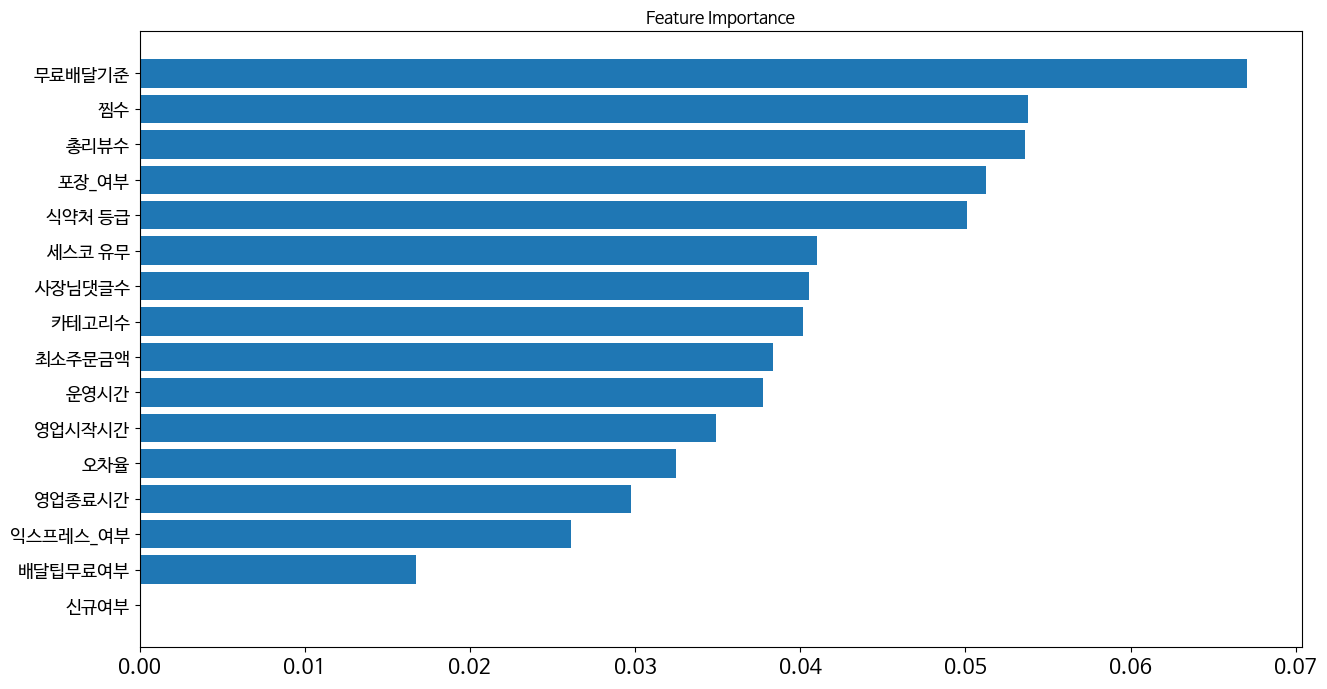

In [14]:
import pandas as pd

# 변수 중요도 계산
feature_importance = best_xgb.feature_importances_

# 변수 중요도 데이터프레임 생성
fi_df = pd.DataFrame(feature_importance, columns=['Importance'], index=X_train.columns)

# 변수 중요도 내림차순 정렬
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# # 변수 중요도 출력
# print(fi_df)

FI = pd.DataFrame(best_xgb.feature_importances_,
             columns = ['feature_importance'],
             index=X.columns)
# 특정 칼럼들 선택
selected_columns = ['식약처 등급','세스코 유무','찜수','총리뷰수','사장님댓글수','영업시작시간','영업종료시간','신규여부','최소주문금액','무료배달기준','배달팁무료여부','카테고리수','익스프레스_여부','포장_여부','운영시간','오차율']
filtered_fi = FI.loc[selected_columns]

# 변수 중요도를 기준으로 내림차순 정렬
filtered_fi = filtered_fi.sort_values(by='feature_importance', ascending=True)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.barh(filtered_fi.index, filtered_fi['feature_importance'].values)

# 글자 크기 조절
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)

plt.show()

# -------------------------------------------

# RF

# 스케일링 전/ 오버샘플링 전

In [2]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,0.0,1.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,0.0,0.0,1.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [3]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
RF = RandomForestClassifier(random_state=0,  n_jobs=-1)

RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print(accuracy_score(y_test, pred))

0.6647727272727273


In [5]:
scores = []
#최적의 n_estimator
for i in range(5, 400, 5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0,  n_jobs=-1)
    RF.fit(X_train, y_train)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc : %.3f' %(i, acc))

>5, acc : 0.625
>10, acc : 0.665
>15, acc : 0.636
>20, acc : 0.659
>25, acc : 0.642
>30, acc : 0.648
>35, acc : 0.665
>40, acc : 0.648
>45, acc : 0.653
>50, acc : 0.659
>55, acc : 0.648
>60, acc : 0.653
>65, acc : 0.653
>70, acc : 0.659
>75, acc : 0.665
>80, acc : 0.670
>85, acc : 0.670
>90, acc : 0.665
>95, acc : 0.659
>100, acc : 0.665
>105, acc : 0.670
>110, acc : 0.670
>115, acc : 0.670
>120, acc : 0.665
>125, acc : 0.670
>130, acc : 0.670
>135, acc : 0.670
>140, acc : 0.670
>145, acc : 0.670
>150, acc : 0.676
>155, acc : 0.670
>160, acc : 0.676
>165, acc : 0.670
>170, acc : 0.670
>175, acc : 0.670
>180, acc : 0.676
>185, acc : 0.670
>190, acc : 0.676
>195, acc : 0.676
>200, acc : 0.688
>205, acc : 0.676
>210, acc : 0.682
>215, acc : 0.682
>220, acc : 0.682
>225, acc : 0.682
>230, acc : 0.693
>235, acc : 0.682
>240, acc : 0.693
>245, acc : 0.699
>250, acc : 0.688
>255, acc : 0.676
>260, acc : 0.676
>265, acc : 0.670
>270, acc : 0.670
>275, acc : 0.676
>280, acc : 0.682
>285, acc : 

In [6]:
print([i for i in range(len(scores)) if scores[i]==max(scores)])

[48]


In [7]:
RF = RandomForestClassifier(n_estimators=45, random_state=0,  n_jobs=-1)

RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, pred):.5}')
print(f'precision: {precision_score(y_test, pred):.5}')
print(f'recall: {recall_score(y_test, pred):.5}')
print(f'f1: {f1_score(y_test, pred):.5}')
print(classification_report(y_test, pred))

accuracy: 0.65341
precision: 0.61947
recall: 0.79545
f1: 0.69652
              precision    recall  f1-score   support

         0.0       0.71      0.51      0.60        88
         1.0       0.62      0.80      0.70        88

    accuracy                           0.65       176
   macro avg       0.67      0.65      0.65       176
weighted avg       0.67      0.65      0.65       176



# 스케일링 전/ 오버샘플링 후

In [8]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,0.0,1.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,0.0,0.0,1.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [9]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from imblearn.over_sampling import SMOTENC

categorical_features = [1, 7, 8,10,11,13,14,15,16,17,18,19,20,21,22,23,24]  # Replace with the indices of the categorical features in your dataset

# 오버샘플링 SMOTENC 적용 
smotenc = SMOTENC(categorical_features=categorical_features, random_state=0)

X_train_over, y_train_over = smotenc.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (409, 28) (409,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (490, 28) (490,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    245
1.0    245
Name: 평균별점이상, dtype: int64


In [10]:
scores = []
for i in range(5, 400, 5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0,  n_jobs=-1)
    RF.fit(X_train_over, y_train_over)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc : %.3f' %(i, acc))

>5, acc : 0.625
>10, acc : 0.682
>15, acc : 0.670
>20, acc : 0.653
>25, acc : 0.670
>30, acc : 0.670
>35, acc : 0.659
>40, acc : 0.648
>45, acc : 0.688
>50, acc : 0.688
>55, acc : 0.710
>60, acc : 0.682
>65, acc : 0.693
>70, acc : 0.676
>75, acc : 0.682
>80, acc : 0.693
>85, acc : 0.699
>90, acc : 0.693
>95, acc : 0.705
>100, acc : 0.682
>105, acc : 0.693
>110, acc : 0.699
>115, acc : 0.710
>120, acc : 0.705
>125, acc : 0.710
>130, acc : 0.693
>135, acc : 0.693
>140, acc : 0.688
>145, acc : 0.682
>150, acc : 0.688
>155, acc : 0.676
>160, acc : 0.688
>165, acc : 0.693
>170, acc : 0.688
>175, acc : 0.682
>180, acc : 0.676
>185, acc : 0.688
>190, acc : 0.682
>195, acc : 0.682
>200, acc : 0.676
>205, acc : 0.676
>210, acc : 0.676
>215, acc : 0.682
>220, acc : 0.676
>225, acc : 0.665
>230, acc : 0.670
>235, acc : 0.670
>240, acc : 0.682
>245, acc : 0.670
>250, acc : 0.670
>255, acc : 0.659
>260, acc : 0.665
>265, acc : 0.659
>270, acc : 0.665
>275, acc : 0.665
>280, acc : 0.648
>285, acc : 

In [11]:
print([i for i in range(len(scores)) if scores[i]==max(scores)])

[10, 22, 24]


In [12]:
RF = RandomForestClassifier(n_estimators=180, random_state=0,  n_jobs=-1)

RF.fit(X_train_over, y_train_over)
pred = RF.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, pred):.5}')
print(f'precision: {precision_score(y_test, pred):.5}')
print(f'recall: {recall_score(y_test, pred):.5}')
print(f'f1: {f1_score(y_test, pred):.5}')
print(classification_report(y_test, pred))

accuracy: 0.67614
precision: 0.65657
recall: 0.73864
f1: 0.69519
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65        88
         1.0       0.66      0.74      0.70        88

    accuracy                           0.68       176
   macro avg       0.68      0.68      0.67       176
weighted avg       0.68      0.68      0.67       176



# 스케일링 후/ 오버샘플링 전

In [13]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,0.0,1.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,0.0,0.0,1.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [14]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

#스케일링
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [15]:
scores = []
for i in range(5, 400, 5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0,  n_jobs=-1)
    RF.fit(X_train_scaled, y_train)
    
    att = RF.predict(X_test_scaled)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc : %.3f' %(i, acc))

>5, acc : 0.625
>10, acc : 0.665
>15, acc : 0.636
>20, acc : 0.653
>25, acc : 0.642
>30, acc : 0.642
>35, acc : 0.665
>40, acc : 0.653
>45, acc : 0.648
>50, acc : 0.653
>55, acc : 0.648
>60, acc : 0.653
>65, acc : 0.653
>70, acc : 0.653
>75, acc : 0.659
>80, acc : 0.665
>85, acc : 0.670
>90, acc : 0.665
>95, acc : 0.659
>100, acc : 0.665
>105, acc : 0.670
>110, acc : 0.670
>115, acc : 0.670
>120, acc : 0.665
>125, acc : 0.665
>130, acc : 0.665
>135, acc : 0.665
>140, acc : 0.665
>145, acc : 0.670
>150, acc : 0.676
>155, acc : 0.670
>160, acc : 0.676
>165, acc : 0.670
>170, acc : 0.670
>175, acc : 0.670
>180, acc : 0.676
>185, acc : 0.670
>190, acc : 0.676
>195, acc : 0.676
>200, acc : 0.688
>205, acc : 0.676
>210, acc : 0.682
>215, acc : 0.682
>220, acc : 0.682
>225, acc : 0.682
>230, acc : 0.693
>235, acc : 0.682
>240, acc : 0.688
>245, acc : 0.699
>250, acc : 0.688
>255, acc : 0.676
>260, acc : 0.676
>265, acc : 0.670
>270, acc : 0.670
>275, acc : 0.676
>280, acc : 0.682
>285, acc : 

In [16]:
print([i for i in range(len(scores)) if scores[i]==max(scores)])

[48]


In [41]:
RF = RandomForestClassifier(n_estimators=245, random_state=0,  n_jobs=-1)

RF.fit(X_train_scaled, y_train)
pred = RF.predict(X_test_scaled)

print(f'accuracy: {accuracy_score(y_test, pred):.5}')
print(f'precision: {precision_score(y_test, pred):.5}')
print(f'recall: {recall_score(y_test, pred):.5}')
print(f'f1: {f1_score(y_test, pred):.5}')
print(classification_report(y_test, pred))

accuracy: 0.69886
precision: 0.65487
recall: 0.84091
f1: 0.73632
              precision    recall  f1-score   support

         0.0       0.78      0.56      0.65        88
         1.0       0.65      0.84      0.74        88

    accuracy                           0.70       176
   macro avg       0.72      0.70      0.69       176
weighted avg       0.72      0.70      0.69       176



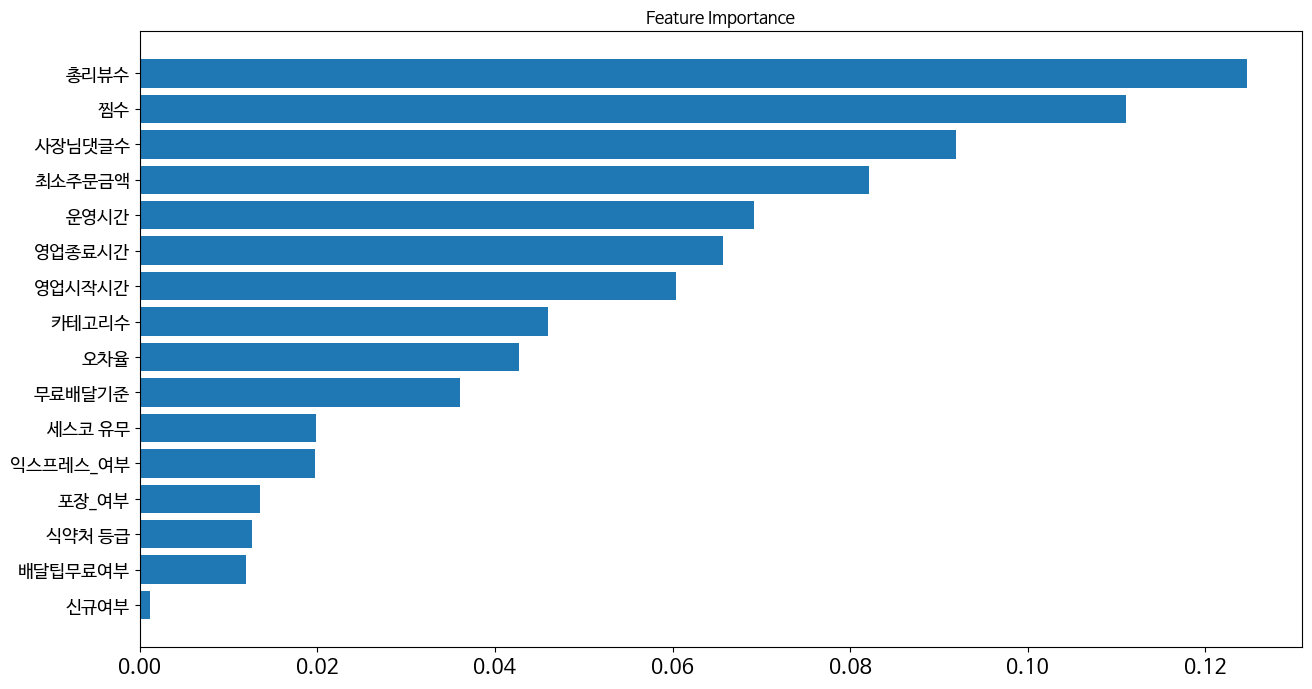

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
# 변수 중요도 계산
feature_importance = RF.feature_importances_

# 변수 중요도 데이터프레임 생성
fi_df = pd.DataFrame(feature_importance, columns=['Importance'], index=X_train.columns)

# 변수 중요도 내림차순 정렬
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# # 변수 중요도 출력
# print(fi_df)

FI = pd.DataFrame(RF.feature_importances_,
             columns = ['feature_importance'],
             index=X.columns)
# 특정 칼럼들 선택
selected_columns = ['식약처 등급','세스코 유무','찜수','총리뷰수','무료배달기준','사장님댓글수','영업시작시간','영업종료시간','신규여부','최소주문금액','무료배달기준','배달팁무료여부','카테고리수','익스프레스_여부','포장_여부','운영시간','오차율']
filtered_fi = FI.loc[selected_columns]

# 변수 중요도를 기준으로 내림차순 정렬
filtered_fi = filtered_fi.sort_values(by='feature_importance', ascending=True)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.barh(filtered_fi.index, filtered_fi['feature_importance'].values)

# 글자 크기 조절
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)

plt.show()

# 스케일링 후/ 오버샘플링 후

In [19]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,0.0,1.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,0.0,0.0,1.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [20]:
X = df.drop('평균별점이상',axis=1)
y=df['평균별점이상']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from imblearn.over_sampling import SMOTENC

categorical_features = [1, 7, 8,10,11,13,14,15,16,17,18,19,20,21,22,23,24]  # Replace with the indices of the categorical features in your dataset

# 오버샘플링 SMOTENC 적용
smotenc = SMOTENC(categorical_features=categorical_features, random_state=0)

X_train_over, y_train_over = smotenc.fit_resample(X_train_scaled, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (409, 28) (409,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (490, 28) (490,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    245
1.0    245
Name: 평균별점이상, dtype: int64


In [21]:
len(categorical_features)

17

In [22]:
scores = []
# 최적의 n_estimators
for i in range(5, 400, 5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0, n_jobs=-1)
    RF.fit(X_train_over, y_train_over)
    
    att = RF.predict(X_test_scaled)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc : %.3f' %(i, acc))

>5, acc : 0.648
>10, acc : 0.688
>15, acc : 0.705
>20, acc : 0.688
>25, acc : 0.710
>30, acc : 0.722
>35, acc : 0.699
>40, acc : 0.722
>45, acc : 0.716
>50, acc : 0.705
>55, acc : 0.710
>60, acc : 0.716
>65, acc : 0.682
>70, acc : 0.733
>75, acc : 0.722
>80, acc : 0.710
>85, acc : 0.716
>90, acc : 0.733
>95, acc : 0.727
>100, acc : 0.716
>105, acc : 0.716
>110, acc : 0.722
>115, acc : 0.722
>120, acc : 0.727
>125, acc : 0.722
>130, acc : 0.716
>135, acc : 0.716
>140, acc : 0.716
>145, acc : 0.710
>150, acc : 0.716
>155, acc : 0.710
>160, acc : 0.710
>165, acc : 0.705
>170, acc : 0.705
>175, acc : 0.722
>180, acc : 0.710
>185, acc : 0.716
>190, acc : 0.722
>195, acc : 0.722
>200, acc : 0.716
>205, acc : 0.710
>210, acc : 0.727
>215, acc : 0.727
>220, acc : 0.722
>225, acc : 0.727
>230, acc : 0.716
>235, acc : 0.722
>240, acc : 0.722
>245, acc : 0.722
>250, acc : 0.727
>255, acc : 0.733
>260, acc : 0.727
>265, acc : 0.705
>270, acc : 0.705
>275, acc : 0.693
>280, acc : 0.710
>285, acc : 

In [23]:
print([i for i in range(len(scores)) if scores[i]==max(scores)])

[13, 17, 50]


In [44]:
RF = RandomForestClassifier(n_estimators=70, random_state=0)

RF.fit(X_train_over, y_train_over)
pred = RF.predict(X_test_scaled)

print(f'accuracy: {accuracy_score(y_test, pred):.5}')
print(f'precision: {precision_score(y_test, pred):.5}')
print(f'recall: {recall_score(y_test, pred):.5}')
print(f'f1: {f1_score(y_test, pred):.5}')
print(classification_report(y_test, pred))

accuracy: 0.73295
precision: 0.69524
recall: 0.82955
f1: 0.75648
              precision    recall  f1-score   support

         0.0       0.79      0.64      0.70        88
         1.0       0.70      0.83      0.76        88

    accuracy                           0.73       176
   macro avg       0.74      0.73      0.73       176
weighted avg       0.74      0.73      0.73       176



In [45]:
# XGB 결과 비교
results = {
    'Best Score': [0.7213217403749822, 0.7592024539877301, 0.7139687991985116, 0.7530924235622725],
    'Accuracy': [0.65909, 0.63636, 0.66477, 0.64205],
    'Precision': [0.61667, 0.61321, 0.62185, 0.61905],
    'Recall': [0.84091, 0.73864, 0.84091, 0.73864],
    'F1': [0.71154, 0.6701, 0.71498, 0.67358]
}

index_labels = ['XGB1', 'XGB2', 'XGB3', 'XGB4']

df = pd.DataFrame(results, index=index_labels)
df

,Best Score,Accuracy,Precision,Recall,F1
XGB1,0.721322,0.65909,0.61667,0.84091,0.71154
XGB2,0.759202,0.63636,0.61321,0.73864,0.67010
XGB3,0.713969,0.66477,0.62185,0.84091,0.71498
XGB4,0.753092,0.64205,0.61905,0.73864,0.67358


In [26]:
# RF 결과 비교
results = {
    'Accuracy': [0.68182, 0.69886, 0.69886, 0.67614],
    'Precision': [0.63559, 0.6699, 0.64706, 0.65347],
    'Recall': [0.85227, 0.78409, 0.875, 0.75],
    'F1': [0.72816, 0.72251, 0.74396, 0.69841]
}

index_labels = ['RF1', 'RF2', 'RF3', 'RF4']

df = pd.DataFrame(results, index=index_labels)
df

,Accuracy,Precision,Recall,F1
RF1,0.68182,0.63559,0.85227,0.72816
RF2,0.69886,0.66990,0.78409,0.72251
RF3,0.69886,0.64706,0.87500,0.74396
RF4,0.67614,0.65347,0.75000,0.69841


 - XGB 스케일링 후/ 오버샘플링 후 가 성능이 가장 좋다. 이를 기준으로 변수중요도 검사를 해봄.

In [ ]:
import pandas as pd

# 변수 중요도 계산
feature_importance = best_xgb.feature_importances_

# 변수 중요도 데이터프레임 생성
fi_df = pd.DataFrame(feature_importance, columns=['Importance'], index=X_train.columns)

# 변수 중요도 내림차순 정렬
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# # 변수 중요도 출력
# print(fi_df)

FI = pd.DataFrame(best_xgb.feature_importances_,
             columns = ['feature_importance'],
             index=X.columns)

# 변수 중요도를 기준으로 내림차순 정렬
FI = FI.sort_values(by='feature_importance', ascending=True)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.barh(FI.index, FI['feature_importance'].values)

# 글자 크기 조절
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)

plt.show()

In [28]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('df3.csv')
df

,식약처 등급,세스코 유무,찜수,총리뷰수,사장님댓글수,영업시작시간,영업종료시간,신규여부,최소주문금액,무료배달기준,...,고기구이,찜탕,중식,분식,포장_여부,익스프레스_여부,운영시간,배달팁무료여부,평균별점이상,오차율
0,0,1,385.0,3542,547,690,1500,0,15000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,810.0,1.0,0.0,0.125000
1,0,1,807.0,2762,993,0,1439,0,17000,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1439.0,1.0,0.0,0.555556
2,0,0,1084.0,1584,1058,630,1680,0,15000,15000,...,0.0,0.0,0.0,0.0,0.0,1.0,1050.0,0.0,1.0,0.142857
3,0,0,163.0,1403,528,600,1380,0,12000,40000,...,0.0,0.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,1.000000
4,0,1,226.0,541,333,900,1560,0,16900,70000,...,0.0,0.0,0.0,0.0,0.0,1.0,660.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,202.0,589,425,1020,1020,0,21000,500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1.0,0.0,0.500000
581,0,1,163.0,344,335,0,0,0,13500,500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
582,0,1,92.0,182,0,0,0,0,15000,500000,...,0.0,1.0,0.0,0.0,0.0,1.0,1440.0,1.0,1.0,0.000000
583,0,0,98.0,213,11,0,0,0,3000,500000,...,0.0,0.0,0.0,1.0,0.0,1.0,1440.0,1.0,0.0,1.000000


In [30]:
x, y = df.drop('평균별점이상', axis = 1), df['평균별점이상']

# train, test 분할
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# 스케일링
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

# SMOTE
sm = SMOTE(random_state=0)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
x_train_std_sm, y_train_std_sm = sm.fit_resample(x_train_std, y_train)

# SMOTE_NC
categorical_features = [1, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
sm_nc = SMOTENC(categorical_features = categorical_features, random_state = 0)
x_train_smnc, y_train_smnc = sm_nc.fit_resample(x_train, y_train)
x_train_std_smnc, y_train_std_smnc = sm_nc.fit_resample(x_train_std, y_train)


# 데이터셋 리스트 생성
data_list = [
    ['normal', x_train, y_train, x_test],                          # 1번 모델( 전 / 전 )
    ['std', x_train_std, y_train, x_test_std],                     # 2번 모델( 후 / 전 )
    ['sm', x_train_sm, y_train_sm, x_test],                        # 3-1번 모델( 전 / 후) 일반 sm 모델
    ['sm_nc', x_train_smnc, y_train_smnc, x_test],                 # 3-2번 모델( 전 / 후) sm_nc 모델
    ['std_sm', x_train_std_sm, y_train_std_sm, x_test_std],        # 4-1번 모델( 후 / 후) 일반 sm 모델
    ['std_smnc', x_train_std_smnc, y_train_std_smnc, x_test_std]   # 4-2번 모델( 전 / 후) sm_nc 모델
]

# 결과 DF 생성
res_df = pd.DataFrame()
res_df

""


# LGBM

In [31]:
for list in data_list :

    # pipeline 설정
    pipeline_lgbm = Pipeline([
        ('model', LGBMClassifier(random_state=0, n_jobs=-1))  # LightGBM 모델
    ])

    # GridSearchCV를 위한 하이퍼파라미터 그리드 정의
    param_grid_lgbm = {
        'model__num_leaves': [10, 20, 30, 40, 50],  # 트리 가질 수 있는 최대 잎(리프)의 수
        'model__max_depth': [5, 10, 15, 20, 25],  # 트리 최대 깊이
        'model__min_child_samples': [100, 200, 300, 400],  # 리프 노드에 필요한 최소한의 샘플 수
        'model__learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],  # 학습률( 각 트리 가중치를 얼마나 업데이트할지를 결정 )
        'model__n_estimators': [100, 200, 300]  # 생성 트리 개수
    }

    # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
    grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=3)
    grid_search_lgbm.fit(list[1], list[2])

    # 최적의 모델
    best_model_lgbm = grid_search_lgbm.best_estimator_.named_steps['model']

    # 최적의 모델로 예측 수행
    y_pred = grid_search_lgbm.predict(list[3])

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # 데이터프레임 추가
    name_model = 'Lgbm_' + list[0]
    model_list = [name_model, accuracy, recall, f1, precision]
    res_df = res_df.append([model_list], ignore_index = True)

<ipython-input-31-c5d267ef83cc>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-31-c5d267ef83cc>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-31-c5d267ef83cc>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-31-c5d267ef83cc>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-31-c5d267ef83cc>:36: FutureWarning: The frame.append method is deprec

# AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
for list in data_list :
        
    # pipeline 설정
    pipeline_ada = Pipeline([
        ('model', AdaBoostClassifier(random_state=0))  # LightGBM 모델
    ])

    # GridSearchCV를 위한 하이퍼파라미터 그리드 정의
    param_grid_lgbm = {
        'model__learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],  # 학습률( 각 트리 가중치를 얼마나 업데이트할지를 결정 )
        'model__n_estimators': [100, 200, 300]  # 생성 트리 개수
    }

    # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
    grid_search_ada = GridSearchCV(pipeline_ada, param_grid_lgbm, cv=3)
    grid_search_ada.fit(list[1], list[2])

    # 최적의 모델
    best_model_ada = grid_search_ada.best_estimator_.named_steps['model']

    # 최적의 모델로 예측 수행
    y_pred = grid_search_ada.predict(list[3])

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # 데이터프레임 추가
    name_model = 'AdaBoost_' + list[0]
    model_list = [name_model, accuracy, recall, f1, precision]
    res_df = res_df.append([model_list], ignore_index = True)

<ipython-input-36-b85be2d0895f>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-36-b85be2d0895f>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-36-b85be2d0895f>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-36-b85be2d0895f>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append([model_list], ignore_index = True)
<ipython-input-36-b85be2d0895f>:33: FutureWarning: The frame.append method is deprec

In [37]:
res_df.columns = ['name', 'accuracy', 'recall', 'f1', 'precision']
res_df.set_index('name', inplace = True)
res_df

,accuracy,recall,f1,precision
name,,,,
Lgbm_normal,0.670455,0.852273,0.721154,0.625000
Lgbm_std,0.653409,0.829545,0.705314,0.613445
Lgbm_sm,0.687500,0.795455,0.717949,0.654206
Lgbm_sm_nc,0.659091,0.761364,0.690722,0.632075
Lgbm_std_sm,0.659091,0.761364,0.690722,0.632075
Lgbm_std_smnc,0.670455,0.738636,0.691489,0.650000
AdaBoost_normal,0.659091,0.840909,0.711538,0.616667
AdaBoost_std,0.659091,0.840909,0.711538,0.616667
AdaBoost_sm,0.687500,0.772727,0.712042,0.660194


In [38]:
# AdaBoost 제외, 3가지 모델 결과 비교
results = {
    'RF': [0.69886, 0.64706, 0.87500, 0.74396],
    'XGB': [0.66477, 0.62185, 0.84091, 0.71498],
    'Lgbm': [0.664773, 0.875000, 0.723005, 0.616000],
}

index_labels = ['Accuracy', 'Precision', 'Recall', 'F1']

df = pd.DataFrame(results, index=index_labels)
df

,RF,XGB,Lgbm
Accuracy,0.69886,0.66477,0.664773
Precision,0.64706,0.62185,0.875000
Recall,0.87500,0.84091,0.723005
F1,0.74396,0.71498,0.616000
